In [ ]:
# 数据库字段
# user_id item_id category_id behavior_type timestamp datestamp  unique_id
# behavior_type 行为类型，枚举类型，包括(pv点击, buy购买, cart购物车, fav收藏)
# 单表有一亿条以上的数据量

In [ ]:
#将数据导入mysql中进行数据分析，mysql效率较低不再使用
import pymysql
db = pymysql.connect(
    host='localhost',
    port=3306,
    user='root',
    passwd='root',
    db='taobao_user_behavior',
    charset='utf8'
)
cursor = db.cursor()

def whitch_date_shop_max():
    """
    查询每个日期下，商品被点击的次数最多的商品
    :return: None
    """
    sql = """
        SELECT datestamp, item_id, COUNT(*) AS count
        FROM user_behavior
        WHERE behavior_type = 'buy'
        GROUP BY datestamp, item_id
        ORDER BY datestamp, count DESC
    """
    cursor.execute(sql)
    results = cursor.fetchall()
    
    for row in results:
        print(f"Date: {row[0]}, Item ID: {row[1]}, Count: {row[2]}")

      购买次数      点击次数     加购次数
0  2015839  89715510  5530446


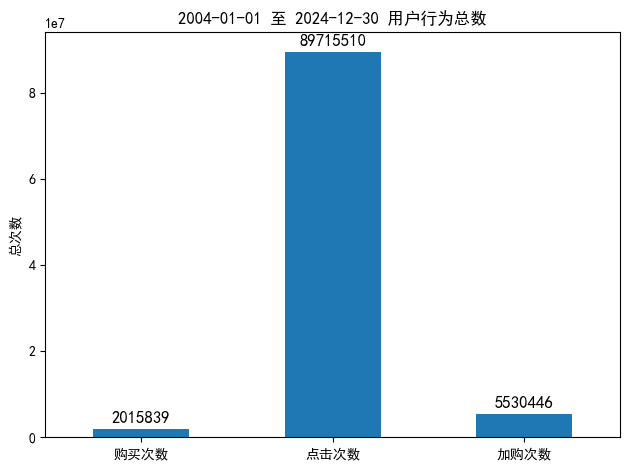

In [ ]:
#用户行为总数
#将数据导入PostgreSQL数据库进行数据分析
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt

# 设置matplotlib的字体参数
plt.rcParams['font.sans-serif'] = ['SimHei'] # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False # 用来正常显示负号

conn = psycopg2.connect(
    host="localhost",
    port="5432",
    database="taobao",
    user="postgres",
    password="root"
)

cur = conn.cursor()
cur.execute("""
    SELECT 
        SUM(CASE WHEN behavior_type = 'buy' THEN 1 ELSE 0 END) AS buy_count,
        SUM(CASE WHEN behavior_type = 'pv' THEN 1 ELSE 0 END) AS click_count,
        SUM(CASE WHEN behavior_type = 'cart' THEN 1 ELSE 0 END) AS cart_count
    FROM userbehavior 
    WHERE datestamp BETWEEN '2004-01-01' AND '2024-12-30';
""")

data = cur.fetchall()

# 用 pandas 生成表格
df = pd.DataFrame(data, columns=['购买次数', '点击次数', '加购次数'])
print(df)

# 可视化（柱状图）
ax = df.T.plot(kind='bar', legend=False)
plt.ylabel('总次数')
plt.title('2004-01-01 至 2024-12-30 用户行为总数')
plt.xticks(rotation=0)
plt.tight_layout()
for i, v in enumerate(df.iloc[0]):
    ax.text(i, v + max(df.iloc[0]) * 0.01, str(v), ha='center', va='bottom', fontsize=12)

plt.show()

cur.close()
conn.close()